# Máquina de Vectores de Soporte (Support Vector Machine)

_Temas Selectos de IA_

__Victor Hugo Martínez González 8SD__

La Máquina de Vectores de Soporte (SVM) es un __algoritmo de aprendizaje automático supervisado__ que se utiliza principalmente para problemas de __clasificación__, aunque también puede aplicarse a problemas de regresión. Su objetivo principal es encontrar un __hiperplano óptimo que separe las diferentes clases de datos de manera efectiva.__

> **Nota**: Las SVM son particularmente eficaces para conjuntos de datos relativamente pequeños y con pocos valores atípicos.

Los **vectores de soporte** son los puntos de datos más cercanos al hiperplano de separación. Estos puntos son cruciales para definir el hiperplano, ya que su eliminación alteraría la posición del mismo. Por lo tanto, los vectores de soporte son esenciales para construir el modelo SVM.

![vsm01](./img/vsm01.png)

## Hiperplano

En geometría, un hiperplano es un subespacio con una dimensión menos que el espacio en el que se encuentra. Por ejemplo, en un espacio de dimensión \( n \), un hiperplano es un subconjunto plano de dimensión \( n - 1 \). El hiperplano separa el espacio en dos mitades.

![hyperplane](./img/hyperplane.webp)

![01](./img/01.png)

![02](./img/02.png)

Encontrar el hiperplano que clasifique correctamente la mayoría de las observaciones, excepto algunas, es un problema de optimización convexa. Aunque la demostración matemática está fuera del alcance de esta introducción, es relevante mencionar que el proceso de optimización incluye un hiperparámetro denominado `C`. 

El hiperparámetro `C` controla el número y la severidad de las violaciones del margen (y del hiperplano) permitidas durante el ajuste. Un valor de `C` muy alto (infinito) implica que no se permiten violaciones del margen, lo que resulta en el `Maximal Margin Classifier` (siempre que las clases sean perfectamente separables). A medida que `C` se aproxima a cero, la penalización por errores disminuye, permitiendo que más observaciones se encuentren en el lado incorrecto del margen o del hiperplano. Por lo tanto, `C` controla el equilibrio entre sesgo (bias) y varianza del modelo. El valor óptimo de `C` se determina mediante validación cruzada.

El proceso de optimización revela que solo las observaciones en el margen o que lo violan influyen en la definición del hiperplano. Estas observaciones se denominan vectores de soporte y son las que determinan el clasificador. Cuando `C` es pequeño, el margen es más amplio y más observaciones violan el margen, lo que aumenta el sesgo pero reduce la varianza. Cuando `C` es grande, el margen es más estrecho, hay menos vectores de soporte, y el clasificador tiene menor sesgo pero mayor varianza.

Otra ventaja significativa es que el hiperplano depende únicamente de un pequeño conjunto de observaciones (vectores de soporte), lo que confiere robustez frente a observaciones extremas. Esto distingue a las SVM de otros métodos, como el `Linear Discriminant Analysis (LDA)`, que dependen de la media de todas las observaciones.

## Funcionamiento

Consideremos un conjunto de datos con dos etiquetas: rojos y azules, y dos características: x e y. Nuestro objetivo es diseñar un clasificador que determine si un punto (x, y) es rojo o azul. Los datos de entrenamiento se representan en un plano:

![funcionamiento](./img/svm01.webp)

Para las SVM, buscamos el hiperplano que maximiza el margen entre las dos etiquetas. Es decir, buscamos la línea (en este caso) cuya distancia al punto más cercano de cada etiqueta sea la mayor posible.

![hyperplane](./img/svm02.webp)

## Kernel

El uso de **kernels** permite que las SVM manejen datos no linealmente separables al transformar el espacio de características en uno de mayor dimensión donde los datos se vuelven linealmente separables.

![kernel](./img/svm03.webp)
![kernel2](./img/kernel02.png)
![kernel3](./img/kernel03.png)

## Elegibilidad y Limitaciones

Las SVM son adecuadas para problemas de clasificación donde se desea maximizar el margen de separación entre las clases, especialmente cuando los datos son linealmente separables o se pueden transformar para hacerlo. Son especialmente útiles en escenarios con un número moderado de características y cuando la claridad en la separación de clases es crucial.

Sin embargo, las SVM pueden ser menos efectivas para conjuntos de datos muy grandes debido a su alta complejidad computacional. También pueden requerir una cuidadosa selección de hiperparámetros y el uso de kernels para manejar datos no lineales. En escenarios con muchas características o datos ruidosos, otras técnicas como los árboles de decisión o redes neuronales podrían ser más adecuadas.

## Ejemplo Código

Para el siguiente ejemplo se emplea un set de datos publicado en el libro Elements of Statistical Learning que contiene observaciones simuladas con una función no lineal en un espacio de dos dimensiones (2 predictores). El objetivo es entrenar un modelo SVM capaz de clasificar las observaciones. 

### Librerías 

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd  # Librería para la manipulación y análisis de datos
import numpy as np  # Librería para operaciones numéricas avanzadas

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt  # Biblioteca para generar gráficos y visualizaciones
from matplotlib import style  # Módulo para configurar estilos gráficos
import seaborn as sns  # Biblioteca de visualización de datos basada en matplotlib
from mlxtend.plotting import plot_decision_regions  # Función para visualizar las regiones de decisión de modelos

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC  # Implementación del algoritmo de Support Vector Classifier (SVC)
from sklearn.model_selection import train_test_split  # Función para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import GridSearchCV  # Clase para realizar búsqueda en cuadrícula de hiperparámetros
from sklearn.metrics import accuracy_score  # Función para calcular la precisión del modelo

# Configuración matplotlib
# ==============================================================================
# Configuración para utilizar el colormap 'bwr' en las visualizaciones
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"  # Configuración opcional para la resolución de las figuras (desactivada)
plt.rcParams['savefig.bbox'] = "tight"  # Asegura que los gráficos se guarden ajustados en el marco
style.use('ggplot') or plt.style.use('ggplot')  # Se define el estilo 'ggplot' para las gráficas

# Configuración warnings
# ==============================================================================
import warnings  # Módulo para el control de advertencias en Python
warnings.filterwarnings('ignore')  # Se ignoran las advertencias para evitar mensajes innecesarios


### Datos

In [3]:
# Datos
# ==============================================================================
# Definimos la URL donde se encuentra el conjunto de datos CSV
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
      + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'

# Leemos los datos directamente desde la URL en un DataFrame de pandas
datos = pd.read_csv(url)

# Mostramos las primeras 3 filas del conjunto de datos para verificar su estructura
datos

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0
...,...,...,...
195,0.256750,2.293605,1
196,1.925173,0.165053,1
197,1.301941,0.992200,1
198,0.008131,2.242264,1


In [27]:
datos.y.unique()

array([0, 1])

Text(0.5, 1.0, 'Datos ESL.mixture')

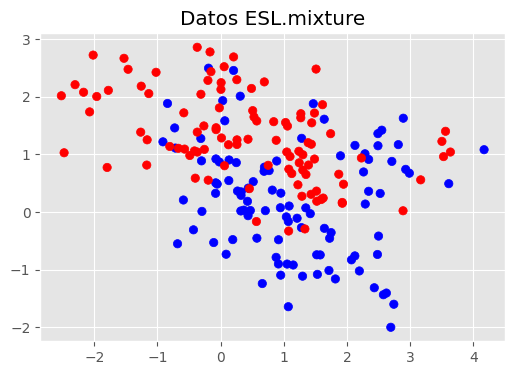

[CV 1/3] END .......C=1e-05;, score=(train=0.764, test=0.685) total time=   0.0s
[CV 2/3] END C=0.00018329807108324357;, score=(train=0.505, test=0.491) total time=   0.0s
[CV 3/3] END C=0.003359818286283781;, score=(train=0.505, test=0.491) total time=   0.0s
[CV 1/3] END C=20.6913808111479;, score=(train=0.840, test=0.759) total time=   0.0s
[CV 2/3] END C=20.6913808111479;, score=(train=0.850, test=0.868) total time=   0.0s
[CV 1/3] END C=127427.49857031321;, score=(train=0.953, test=0.778) total time=   0.6s
[CV 2/3] END ..C=10000000.0;, score=(train=0.981, test=0.679) total time=   2.1s
[CV] END ............................C=4.281332398719396e-05; total time=   0.0s
[CV] END ..............................C=0.06158482110660261; total time=   0.0s
[CV] END ..............................C=0.26366508987303555; total time=   0.0s
[CV] END ................................C=88.58667904100814; total time=   0.0s
[CV] END ................................C=88.58667904100814; total time=   0

In [18]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(6, 4))  # Se crea una figura con un tamaño de 6x4 pulgadas

# Gráfico de dispersión (scatter plot) de los datos
ax.scatter(datos.X1, datos.X2, c=datos.y)  # Se trazan los puntos de datos utilizando las columnas X1 y X2 como coordenadas
                                           # El color de cada punto está determinado por la columna 'y', que probablemente 
                                           # sea una variable de clasificación o etiquetas

# Título del gráfico
ax.set_title("Datos ESL.mixture")  # Se añade un título al gráfico


### SVM lineal

En Scikit Learn pueden encontrarse tres implementaciones distintas del algoritmo Suport Vector Machine:

- Las clases ```sklearn.svm.SVC``` y ```sklearn.svm.NuSVC``` permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que ```SVC``` controla la regularización a través del hiperparámetro ```C```, mientras que ```NuSVC``` lo hace con el número máximo de vectores soporte permitidos.

- La clase ```sklearn.svm.LinearSVC``` permite ajustar modelos SVM con kernel lineal. Es similar a ```SVC``` cuando el parámetro ```kernel='linear'```, pero utiliza un algoritmo más rápido.

Las mismas implementaciones están disponibles para regresión en las clases: ```sklearn.svm.SVR```, ```sklearn.svm.NuSVR``` y ```sklearn.svm.LinearSVR```.

Se ajusta primero un modelo SVM con kernel lineal y después uno con kernel radial, y se compara la capacidad de cada uno para clasificar correctamente las observaciones. 

In [4]:
# División de los datos en train y test
# ==============================================================================

# Separamos las características (X) y la variable objetivo o etiquetas (y)
X = datos.drop(columns='y')  # 'X' contiene todas las columnas excepto 'y'
y = datos['y']  # 'y' contiene solo la columna 'y', que es la variable a predecir

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,                      # Conjunto de características
    y.values.reshape(-1, 1), # La variable objetivo 'y' se ajusta a un array de 2D
    train_size=0.8,          # El 80% de los datos se utilizarán para entrenamiento
    random_state=1234,       # Fija una semilla para garantizar que la división sea reproducible
    shuffle=True,            # Mezcla los datos antes de dividirlos
    stratify=y               # Asegura que la proporción de clases en 'y' sea igual en los conjuntos de entrenamiento y prueba
)


1. ```SVC(C=100, kernel='linear', random_state=123)```: Se crea un modelo de Support Vector Classifier (SVC) utilizando un kernel lineal:

   - ```C=100```: Parámetro de regularización que controla el margen del hiperplano separador. Un valor grande de ```C``` trata de clasificar todos los puntos correctamente, mientras que un valor pequeño permite más margen con algunos errores.
   - ```kernel='linear'```: Se especifica que el modelo utilice un ```kernel lineal```, lo que significa que el clasificador intentará encontrar una línea recta (o hiperplano) que separe las clases en los datos.
   - ```random_state=123```: Se establece una semilla para asegurar la reproducibilidad del entrenamiento.

2. ```modelo.fit(X_train, y_train)```: El modelo SVM se entrena con los datos de entrenamiento ```(X_train y y_train)```. Durante este paso, el algoritmo ajusta un hiperplano que separa las clases de manera óptima dentro del espacio de características.

In [5]:
# Creación del modelo SVM lineal
# ==============================================================================

# Se crea una instancia del modelo SVM con un kernel lineal
modelo = SVC(C=100, kernel='linear', random_state=123)

# Entrenamiento del modelo SVM con los datos de entrenamiento
modelo.fit(X_train, y_train)


SVC(C=100, kernel='linear', random_state=123)



Al tratarse de un problema de dos dimensiones, se puede representar las regiones de clasificación.


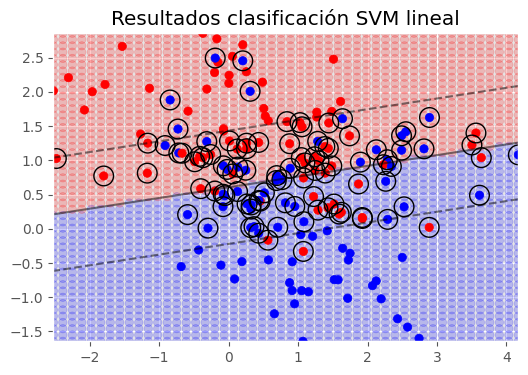

In [6]:
# Representación gráfica de los límites de clasificación
# ==============================================================================

# Grid de valores
# Se generan valores en un grid (rejilla) para visualizar el espacio de características
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)  # Valores en el eje X
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)  # Valores en el eje Y
Y, X = np.meshgrid(y, x)  # Crea una malla a partir de los valores de X y Y
grid = np.vstack([X.ravel(), Y.ravel()]).T  # Coloca las coordenadas de la malla en un solo array para predicción

# Predicción de valores en el grid
# Se predice la clase para cada punto de la rejilla utilizando el modelo SVM entrenado
pred_grid = modelo.predict(grid)

# Creación de la figura
fig, ax = plt.subplots(figsize=(6, 4))  # Se crea una figura de 6x4 pulgadas

# Gráfico de dispersión de los puntos en el grid con colores según la predicción
ax.scatter(grid[:, 0], grid[:, 1], c=pred_grid, alpha=0.2)  # Puntos del grid con opacidad del 20%
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha=1)  # Puntos de los datos de entrenamiento

# Vectores soporte
# Se destacan los vectores soporte encontrados por el modelo
ax.scatter(
    modelo.support_vectors_[:, 0],  # Coordenadas X de los vectores soporte
    modelo.support_vectors_[:, 1],  # Coordenadas Y de los vectores soporte
    s=200, linewidth=1,  # Tamaño del punto y grosor del borde
    facecolors='none', edgecolors='black'  # Sin color de relleno, borde negro
)

# Hiperplano de separación
# Se dibuja el hiperplano de decisión y las márgenes
ax.contour(
    X,  # Coordenadas X de la malla
    Y,  # Coordenadas Y de la malla
    modelo.decision_function(grid).reshape(X.shape),  # Función de decisión en el grid para clasificar
    colors='k',  # Color negro para las líneas
    levels=[-1, 0, 1],  # Líneas para las márgenes (-1, 1) y el hiperplano (0)
    alpha=0.5,  # Transparencia de las líneas
    linestyles=['--', '-', '--']  # Líneas discontinuas para las márgenes, continua para el hiperplano
)

# Título del gráfico
ax.set_title("Resultados clasificación SVM lineal");


1. Grid de valores ```(x, y, grid)```: Se genera una rejilla de valores en el espacio de características ```(X1, X2)``` para visualizar las predicciones del modelo SVM sobre todo el espacio.
2. Predicción en el grid ```(pred_grid)```: El modelo SVM predice las clases para cada punto de la rejilla.
3. Visualización de los puntos:

    - Se dibujan los puntos predichos en la rejilla con un color transparente (20%) para mostrar las áreas de clasificación.
    - Los datos de entrenamiento reales se superponen con colores completos (100% de opacidad).

4. Vectores soporte: Los vectores soporte del modelo SVM se destacan en la gráfica con puntos grandes y borde negro.
4. Hiperplano de separación: Se dibuja el hiperplano de separación y las márgenes (con niveles -1, 0, y 1) usando líneas negras. Las líneas discontinuas representan las márgenes y la continua el hiperplano de decisión.

In [7]:
# Predicciones test
# ==============================================================================

# Se realizan predicciones con el modelo entrenado sobre el conjunto de prueba
predicciones = modelo.predict(X_test)

# Mostrar las predicciones realizadas por el modelo
predicciones

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [8]:
# Accuracy de test del modelo 
# ==============================================================================

# Cálculo del accuracy del modelo en el conjunto de prueba
accuracy = accuracy_score(
    y_true=y_test,       # Etiquetas verdaderas del conjunto de prueba
    y_pred=predicciones, # Predicciones realizadas por el modelo
    normalize=True       # Si es True, se devuelve la proporción de aciertos (accuracy)
)

# Imprimir el accuracy en porcentaje
print("")
print(f"El accuracy de test es: {100 * accuracy}%")


El accuracy de test es: 70.0%


1. ```accuracy_score(y_true=y_test, y_pred=predicciones)```: Esta función calcula la precisión (```accuracy```) del modelo. Compara las etiquetas verdaderas (```y_test```) con las predicciones hechas por el modelo (```predicciones```) y devuelve la proporción de muestras correctamente clasificadas.
   
2. ```normalize=True:``` Cuando es ```True```, la función devuelve la proporción de aciertos (porcentaje de muestras correctamente clasificadas). Si fuera ```False```, devolvería el número absoluto de aciertos.

### SVM radial

Se repite el ajuste del modelo, esta vez empleando un kernel radial y utilizando validación cruzada para identificar el valor óptimo de penalización ```C```.

1. ```param_grid = {'C': np.logspace(-5, 7, 20)}```: Se define un rango de valores para el parámetro ```C``` del modelo SVM en una escala logarítmica. ```C``` controla el equilibrio entre el margen y los errores de clasificación.
2. ```GridSearchCV()```: Se utiliza para realizar una búsqueda exhaustiva de los mejores hiperparámetros (en este caso, para ```C```) a través de validación cruzada:

   - ```SVC(kernel="rbf", gamma='scale')```: Modelo SVM con kernel radial.
   - ```scoring='accuracy'```: Se usa la métrica de accuracy para evaluar las predicciones.
   - ```cv=3```: Validación cruzada con 3 particiones.

3. ```grid.fit(X=X_train, y=y_train)```: Se ajusta el modelo a los datos de entrenamiento y se evalúa el rendimiento de cada combinación de hiperparámetros.
4. ```resultados.filter()```: Se filtran las columnas relevantes que contienen los parámetros probados y las métricas (accuracy) en entrenamiento y validación, y se ordenan según el rendimiento. Se muestran los 5 mejores resultados.

In [15]:
# Grid de hiperparámetros
# ==============================================================================
# Se define un diccionario de hiperparámetros a probar.
# 'C' es el parámetro de regularización, que controla la penalización de errores de clasificación.
# 'np.logspace(-5, 7, 20)' genera 20 valores para 'C' en una escala logarítmica entre 10^(-5) y 10^7.
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
    estimator=SVC(kernel="rbf", gamma='scale'), # Se usa un SVM con kernel RBF (Radial Basis Function)
    param_grid=param_grid,                      # El diccionario de hiperparámetros a probar
    scoring='accuracy',                         # La métrica de evaluación es el accuracy
    n_jobs=-1,                                  # Utiliza todos los núcleos disponibles del CPU
    cv=3,                                       # Validación cruzada con 3 particiones (k-fold cross-validation)
    verbose=2,                                  # Nivel de detalle en la salida del proceso
    return_train_score=True                     # Devuelve también los resultados en el conjunto de entrenamiento
)

# Ajuste del modelo (entrenamiento) con los datos de entrenamiento
# El resultado se asigna a la variable "_" para evitar imprimir detalles innecesarios.
_ = grid.fit(X=X_train, y=y_train)

# Resultados del grid
# ==============================================================================
# Se crea un DataFrame con los resultados de la validación cruzada.
resultados = pd.DataFrame(grid.cv_results_)

# Se filtran las columnas que contienen los parámetros probados y las métricas del modelo.
# Se ordenan los resultados por la media del accuracy en las pruebas de validación.
# Finalmente, se muestran los 5 mejores resultados.
resultados.filter(regex='(param.*|mean_t|std_t)')\
    .drop(columns='params')\
    .sort_values('mean_test_score', ascending=False)\
    .head(5)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/hugo/Documents/Tec/IA/U1-NLP/.env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hugo/Documents/Tec/IA/U1-NLP/.env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hugo/Documents/Tec/IA/U1-NLP/.env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hugo/Documents/Tec/IA/U1-NLP/.env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
11,88.586679,0.812602,0.025825,0.871863,0.011780
10,20.691381,0.800256,0.048205,0.849968,0.008250
8,1.128838,0.768926,0.072133,0.784400,0.012784
12,379.269019,0.768810,0.006753,0.890554,0.016450
9,4.832930,0.768577,0.036517,0.806266,0.008426


In [10]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================

# Imprimir una separación para organizar la salida
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")

# Se imprimen los mejores hiperparámetros encontrados por GridSearchCV
# 'grid.best_params_' contiene la mejor combinación de hiperparámetros
# 'grid.best_score_' contiene la mejor puntuación de validación obtenida
# 'grid.scoring' muestra la métrica utilizada (accuracy en este caso)
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Asignar el mejor modelo encontrado a la variable 'modelo'
# 'grid.best_estimator_' contiene el modelo SVM ajustado con los mejores hiperparámetros
modelo = grid.best_estimator_


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 88.58667904100814} : 0.8126019100861868 accuracy


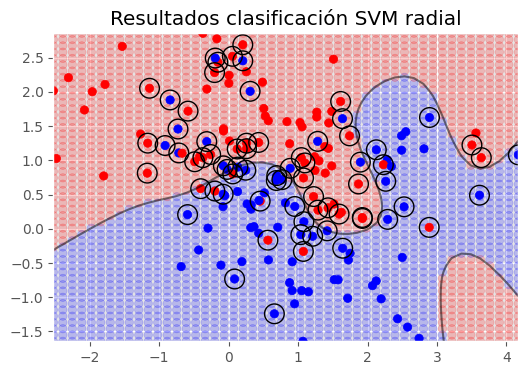

In [11]:
# Representación gráfica de los límites de clasificación
# ==============================================================================

# Grid de valores
# Se generan valores en una rejilla para visualizar el espacio de características
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)  # Valores en el eje X
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)  # Valores en el eje Y
Y, X = np.meshgrid(y, x)  # Crea una malla a partir de los valores de X y Y
grid = np.vstack([X.ravel(), Y.ravel()]).T  # Coloca las coordenadas de la malla en un solo array para predicción

# Predicción de valores en el grid
# Se predice la clase para cada punto de la rejilla utilizando el modelo SVM ajustado
pred_grid = modelo.predict(grid)

# Creación de la figura
fig, ax = plt.subplots(figsize=(6, 4))  # Se crea una figura de 6x4 pulgadas

# Gráfico de dispersión de los puntos en el grid con colores según la predicción
ax.scatter(grid[:, 0], grid[:, 1], c=pred_grid, alpha=0.2)  # Puntos del grid con opacidad del 20%
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha=1)  # Puntos de los datos de entrenamiento

# Vectores soporte
# Se destacan los vectores soporte encontrados por el modelo
ax.scatter(
    modelo.support_vectors_[:, 0],  # Coordenadas X de los vectores soporte
    modelo.support_vectors_[:, 1],  # Coordenadas Y de los vectores soporte
    s=200, linewidth=1,  # Tamaño del punto y grosor del borde
    facecolors='none', edgecolors='black'  # Sin color de relleno, borde negro
)

# Hiperplano de separación
# Se dibuja el hiperplano de decisión en el espacio de características
ax.contour(
    X,  # Coordenadas X de la malla
    Y,  # Coordenadas Y de la malla
    modelo.decision_function(grid).reshape(X.shape),  # Función de decisión en el grid para clasificar
    colors='k',  # Color negro para la línea
    levels=[0],  # Línea para el hiperplano de decisión (donde la función de decisión es 0)
    alpha=0.5,  # Transparencia de la línea
    linestyles='-'  # Línea continua para el hiperplano
)

# Título del gráfico
ax.set_title("Resultados clasificación SVM radial");


1. Grid de valores ```(x, y, grid)```: Se crea una rejilla de valores en el espacio de características ```(X1, X2)``` para visualizar cómo clasifica el modelo en todo el espacio.
2. Predicción en el grid ```(pred_grid)```: El modelo ajustado realiza predicciones sobre cada punto en la rejilla.
3. Visualización:

    - Puntos del grid: Se dibujan con colores representativos de las predicciones del modelo, con alta transparencia para mostrar áreas de clasificación.
    - Datos de entrenamiento: Se dibujan con opacidad completa para diferenciarlos de los puntos del grid.

4. Vectores soporte: Se destacan en la gráfica para mostrar cuáles puntos están en el borde de la región de clasificación del modelo.
5. Hiperplano de separación: Se dibuja una línea negra continua que representa el hiperplano de decisión (donde la función de decisión del SVM es igual a 0). Esto separa las dos clases en el espacio de características.

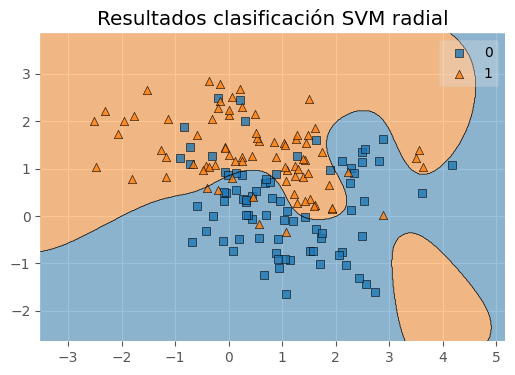

In [12]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================

# Creación de la figura
fig, ax = plt.subplots(figsize=(6, 4))  # Se crea una figura de 6x4 pulgadas

# Visualización de los límites de decisión
# La función 'plot_decision_regions' crea una visualización de los límites de decisión del clasificador
plot_decision_regions(
    X=X_train.to_numpy(),       # Datos de características de entrenamiento convertidos a array NumPy
    y=y_train.flatten(),        # Etiquetas de entrenamiento convertidas a array 1D
    clf=modelo,                 # El clasificador ajustado (modelo SVM radial)
    ax=ax                       # Eje donde se dibujará la visualización
)

# Título del gráfico
ax.set_title("Resultados clasificación SVM radial");


1. ```plot_decision_regions()```: Esta función de mlxtend traza los límites de decisión del clasificador sobre el espacio de características.

    - ```X=X_train.to_numpy()```: Los datos de características de entrenamiento se convierten a un array NumPy para ser utilizados por la función.
    - ```y=y_train.flatten()```: Las etiquetas de entrenamiento se aplanan a un array unidimensional.
    - ```clf=modelo```: El clasificador SVM radial entrenado es pasado a la función para visualizar los límites de decisión.
    ax=ax: El gráfico se dibuja en el eje ax especificado.

2. ```ax.set_title("Resultados clasificación SVM radial")```: Se establece el título del gráfico para describir la visualización.

In [13]:
# Predicciones test
# ==============================================================================
# Realiza predicciones sobre el conjunto de prueba utilizando el modelo ajustado
predicciones = modelo.predict(X_test)

# Accuracy de test del modelo 
# ==============================================================================
# Cálculo del accuracy del modelo en el conjunto de prueba
accuracy = accuracy_score(
    y_true=y_test,       # Etiquetas verdaderas del conjunto de prueba
    y_pred=predicciones, # Predicciones realizadas por el modelo
    normalize=True       # Si es True, se devuelve la proporción de aciertos (accuracy)
)

# Imprimir el accuracy en porcentaje
print("")
print(f"El accuracy de test es: {100 * accuracy}%")

# Matriz de confusión de las predicciones de test
# ==============================================================================
# Se crea una matriz de confusión para evaluar el rendimiento del modelo
# La matriz compara las etiquetas verdaderas con las predicciones
confusion_matrix = pd.crosstab(
    y_test.ravel(),               # Etiquetas verdaderas del conjunto de prueba (aplanadas a 1D)
    predicciones,                 # Predicciones realizadas por el modelo
    rownames=['Real'],            # Nombre para las filas (etiquetas verdaderas)
    colnames=['Predicción']       # Nombre para las columnas (predicciones del modelo)
)

# Mostrar la matriz de confusión
confusion_matrix


El accuracy de test es: 80.0%


Predicción,0,1
Real,,
0,15,5
1,3,17


1. ```Predicciones de test (predicciones)```: Utiliza el modelo ajustado para predecir las clases del conjunto de prueba X_test.

2. Cálculo del ```accuracy```:

    - ```accuracy_score(y_true=y_test, y_pred=predicciones, normalize=True)```: Calcula la precisión ```(accuracy)``` del modelo comparando las etiquetas verdaderas (y_test) con las predicciones del modelo (predicciones). ```normalize=True``` devuelve la precisión como una proporción (valor entre 0 y 1), que luego se multiplica por 100 para obtener un porcentaje.

3. Matriz de confusión ```(confusion_matrix)```:

    - ```pd.crosstab(y_test.ravel(), predicciones, rownames=['Real'], colnames=['Predicción'])```: Crea una tabla de contingencia (matriz de confusión) que muestra la comparación entre las etiquetas verdaderas ```(y_test)``` y las predicciones ```(predicciones). y_test.ravel()``` aplana las etiquetas verdaderas a una dimensión para coincidir con las predicciones.
    - ```confusion_matrix```: Muestra la matriz de confusión, permitiendo analizar el rendimiento del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

### Conclusión 

El __modelo SVM con kernel__ radial ha demostrado ser efectivo para clasificar los datos, con una precisión satisfactoria en el conjunto de prueba. La optimización de hiperparámetros a través de __GridSearchCV__ permitió encontrar la mejor configuración para el modelo, mejorando su rendimiento. La visualización de los límites de decisión y la __matriz de confusión__ han proporcionado una comprensión clara del comportamiento del modelo y su capacidad para generalizar a datos no vistos.

**Recomendaciones**

Para futuros trabajos, se podrían considerar otras técnicas de __preprocesamiento__ o la incorporación de características adicionales para mejorar aún más el rendimiento del modelo. Además, explorar otros tipos de __kernels__ o __algoritmos de clasificación__ podría ofrecer perspectivas adicionales sobre el problema.

### Referencias

[1] Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media, Inc., 2018.

[2] J. Vanderplas, Python Data Analytics Cookbook: Projects from the NumFocus Community. Pearson Educ., Limited, 2018.

[3] Support Vector Machines. New York, NY: Springer New York, 2008. Accedido el 12 de septiembre de 2024. [En línea](https://doi.org/10.1007/978-0-387-77242-4)

[4] T. Hastie, R. Tibshirani y J. Friedman, The Elements of Statistical Learning. New York, NY: Springer New York, 2009. Accedido el 12 de septiembre de 2024. [En línea]. Disponible: https://doi.org/10.1007/978-0-387-84858-7